### 3 - Avaliação:

6/6 [==============================] - 1s 3ms/step


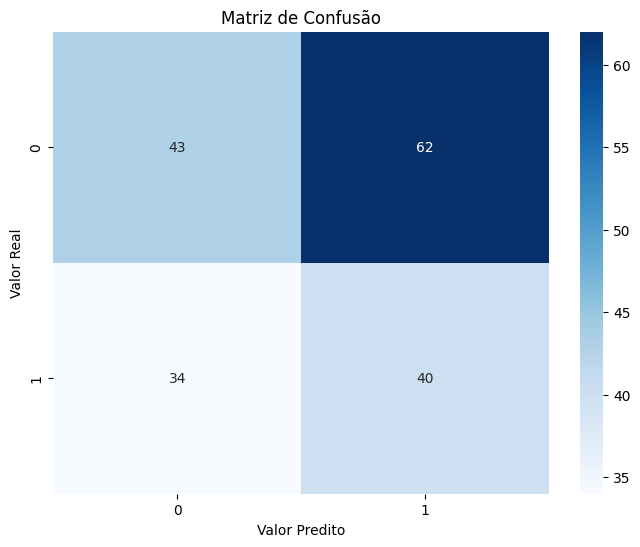

                precision    recall  f1-score   support

Não Sobreviveu       0.56      0.41      0.47       105
    Sobreviveu       0.39      0.54      0.45        74

      accuracy                           0.46       179
     macro avg       0.48      0.48      0.46       179
  weighted avg       0.49      0.46      0.47       179



In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

# Carregar os dados
data = pd.read_csv('../data/preprocessed_titanic.csv')
X = data.drop(['Survived'], axis=1)
y = data['Survived']

# Dividir os dados em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Carregar o modelo salvo
model = tf.keras.models.load_model('../results/model_titanic.h5')

# Previsões no conjunto de validação
y_pred = (model.predict(X_val) > 0.5).astype("int32")

# Matriz de confusão
cm = confusion_matrix(y_val, y_pred)

# Visualizar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Matriz de Confusão')
plt.ylabel('Valor Real')
plt.xlabel('Valor Predito')
plt.savefig('../results/confusion_matrix.png') 
plt.show()

# Relatório de classificação
report = classification_report(y_val, y_pred, target_names=['Não Sobreviveu', 'Sobreviveu'])
with open('../results/model_performance.txt', 'w') as f:
    f.write(report)
print(report)
